In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mutils.data import load_SKEMPI2
from mutils.io import init_plotting, savefig
init_plotting()

In [21]:
df, _ = load_SKEMPI2()
# df = load_SKEMPI2(raw=True)

In [22]:
df

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,dG_mut,dG_wt,ddG,PDB Id,Partner 1,Partner 2
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.260000e-11,5.260000e-11,1.120000e-12,1.120000e-12,...,NaN,NaN,IASP,1,-13.827155,-16.075989,2.248833,1CSE,E,I
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.330000e-12,8.330000e-12,1.120000e-12,1.120000e-12,...,NaN,NaN,IASP,1,-14.903760,-16.075989,1.172229,1CSE,E,I
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.020000e-07,1.020000e-07,1.120000e-12,1.120000e-12,...,NaN,NaN,IASP,1,-9.404712,-16.075989,6.671276,1CSE,E,I
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.720000e-10,1.720000e-10,1.120000e-12,1.120000e-12,...,NaN,NaN,IASP,1,-13.135001,-16.075989,2.940988,1CSE,E,I
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.920000e-09,1.920000e-09,1.120000e-12,1.120000e-12,...,NaN,NaN,IASP,1,-11.725555,-16.075989,4.350434,1CSE,E,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,3QIB_ABP_CD,YP7F,YP6F,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",6.600000e-06,6.600000e-06,5.500000e-06,5.500000e-06,...,NaN,NaN,SPR,2,-7.063473,-7.171435,0.107962,3QIB,ABP,CD
7080,3QIB_ABP_CD,KP9R,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.400000e-04,2.400000e-04,5.500000e-06,5.500000e-06,...,NaN,NaN,SPR,2,-4.935527,-7.171435,2.235909,3QIB,ABP,CD
7082,3QIB_ABP_CD,TP12S,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.380000e-05,3.380000e-05,5.500000e-06,5.500000e-06,...,NaN,NaN,SPR,2,-6.096254,-7.171435,1.075181,3QIB,ABP,CD
7083,3QIB_ABP_CD,TP12N,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.340000e-05,4.340000e-05,5.500000e-06,5.500000e-06,...,NaN,NaN,SPR,2,-5.948216,-7.171435,1.223219,3QIB,ABP,CD


1      0.255747
3      0.063218
7      0.060345
2      0.057471
4      0.051724
         ...   
92     0.002874
46     0.002874
58     0.002874
259    0.002874
14     0.002874
Length: 67, dtype: float64

# General

In [15]:
print(
    'Number of mutations:',
    len(df)
)

print(
    'Number of unique interactions:',
    df['#Pdb'].nunique()
)

print(
    'Number of unique protein pairs:',
    len(df[['Protein 1', 'Protein 2']].drop_duplicates())
)

print(
    'Number of unique proteins:',
    len(set(df['Protein 1'].unique()) | set(df['Protein 2'].unique()))
)

print(
    'Number of unique PDB files:',
    len(set(df['#Pdb'].str[:4]))
)

Number of mutations: 6609
Number of unique interactions: 343
Number of unique protein pairs: 234
Number of unique proteins: 361
Number of unique PDB files: 340


In [21]:
(df['ddG'] > 0).mean()

0.218338629142079

In [18]:
(df['ddG'] > 0).mean()

0.218338629142079

In [12]:
df_core = df[df['iMutation_Location(s)'].str.contains('COR')]

print(
    'The number of entries with mutations at core: ',
    len(df_core)
)

print(
    'Number of unique protein pairs with mutations at core: ',
    len(df_core[['Protein 1', 'Protein 2']].drop_duplicates())
)

The number of entries with mutations at core:  3250
Number of unique protein pairs with mutations at core:  200


# Hold out type

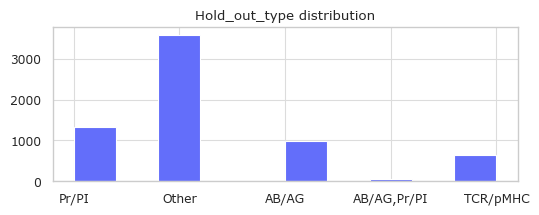

In [13]:
df['Hold_out_type'].hist()
plt.title('Hold_out_type distribution')
plt.show()

# Groups by unique interacting protein pairs

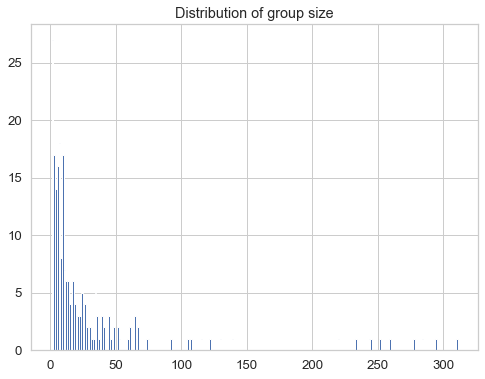

In [10]:
df_gr_size = df.groupby(['Protein 1', 'Protein 2']).size()
df_gr_size.hist(bins=len(df_gr_size))
plt.title('Distribution of group size')
plt.show()

# Non-monomeric partners

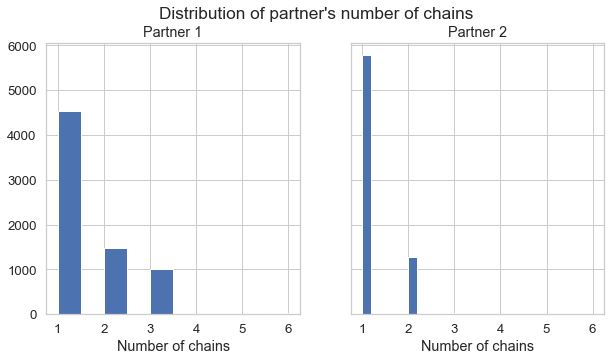

Number of complexes with non-monomeric partners: 122


In [11]:
df_ialign = pd.DataFrame(df['#Pdb'].str.split('_').tolist())
df_ialign.columns = ['Pdb', 'Partner 1', 'Partner 2']

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(10, 5)
df_ialign['Partner 1'].apply(len).hist(ax=ax[0])
df_ialign['Partner 2'].apply(len).hist(ax=ax[1])
ax[0].set_title('Partner 1')
ax[0].set_xlabel('Number of chains')
ax[1].set_title('Partner 2')
ax[1].set_xlabel('Number of chains')
plt.suptitle('Distribution of partner\'s number of chains')
plt.show()

print(
    'Number of complexes with non-monomeric partners:',
    df_ialign[(df_ialign['Partner 1'].str.len() > 1) | (df_ialign['Partner 2'].str.len() > 1)]['Pdb'].nunique()
)

# Number of substitutions

In [14]:
(df['Mutation(s)_cleaned'].str.count(',') + 1).value_counts() / len(df)

1     0.730368
2     0.127251
3     0.048268
4     0.036919
5     0.019821
8     0.009835
6     0.008776
7     0.005598
9     0.005144
10    0.002270
11    0.002118
13    0.000757
15    0.000605
12    0.000605
14    0.000605
16    0.000303
27    0.000303
22    0.000151
18    0.000151
20    0.000151
Name: Mutation(s)_cleaned, dtype: float64

# Number of mutations per PPI

In [23]:
# All
df.groupby('#Pdb').size().value_counts(normalize=True)

1      0.268222
2      0.064140
3      0.064140
4      0.064140
6      0.046647
8      0.040816
7      0.034985
9      0.029155
5      0.029155
10     0.026239
18     0.020408
20     0.020408
22     0.017493
11     0.017493
16     0.014577
13     0.014577
19     0.011662
12     0.011662
26     0.011662
15     0.011662
25     0.008746
45     0.008746
36     0.008746
14     0.008746
35     0.008746
59     0.008746
27     0.008746
30     0.005831
91     0.005831
66     0.005831
295    0.005831
92     0.005831
24     0.005831
46     0.005831
21     0.005831
32     0.002915
67     0.002915
40     0.002915
111    0.002915
218    0.002915
28     0.002915
47     0.002915
245    0.002915
33     0.002915
87     0.002915
248    0.002915
284    0.002915
259    0.002915
50     0.002915
116    0.002915
275    0.002915
74     0.002915
56     0.002915
23     0.002915
39     0.002915
130    0.002915
49     0.002915
94     0.002915
200    0.002915
42     0.002915
dtype: float64

In [28]:
# Single-point
df[df['Mutation(s)_PDB'].str.count(',') + 1 == 1].groupby('#Pdb').size().value_counts(normalize=True)

1      0.303797
2      0.094937
4      0.066456
6      0.053797
3      0.044304
8      0.034810
5      0.034810
7      0.034810
10     0.025316
9      0.022152
11     0.015823
18     0.015823
12     0.012658
25     0.012658
14     0.012658
19     0.012658
13     0.012658
35     0.009494
27     0.009494
20     0.009494
16     0.009494
36     0.006329
17     0.006329
22     0.006329
46     0.006329
33     0.006329
26     0.006329
15     0.006329
205    0.006329
21     0.006329
95     0.003165
156    0.003165
39     0.003165
204    0.003165
29     0.003165
28     0.003165
41     0.003165
40     0.003165
30     0.003165
42     0.003165
245    0.003165
82     0.003165
209    0.003165
62     0.003165
53     0.003165
203    0.003165
50     0.003165
68     0.003165
77     0.003165
138    0.003165
32     0.003165
54     0.003165
23     0.003165
101    0.003165
45     0.003165
48     0.003165
49     0.003165
52     0.003165
134    0.003165
38     0.003165
dtype: float64

# ddG

## Raw distribution

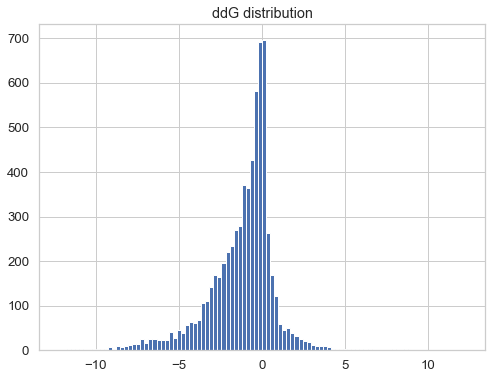

In [3]:
df['ddG'].hist(bins=100)
plt.title('ddG distribution')
plt.show()

## Influence of mutation location on ddG

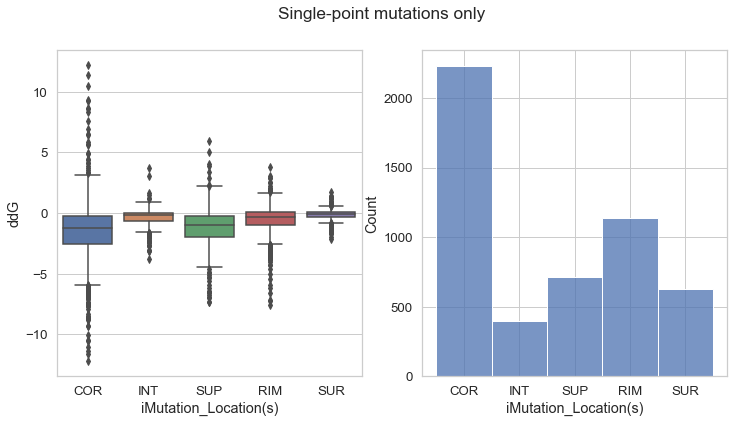

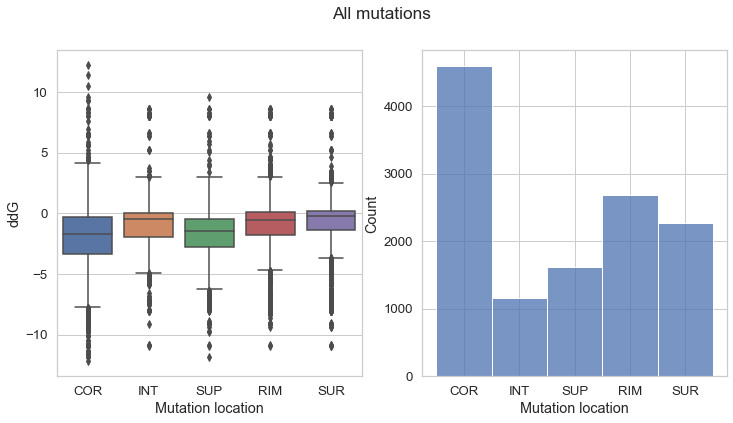

Total number of single-point mutations: 12320


In [5]:
# Plot for single-point mutations only
df['Number of mutations'] = df['Mutation(s)_cleaned'].str.count(',') + 1
df_mutloc = df[df['Number of mutations'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df_mutloc, x='iMutation_Location(s)', y='ddG', ax=ax[0])
sns.histplot(data=df_mutloc, x='iMutation_Location(s)', ax=ax[1])
plt.suptitle('Single-point mutations only')
plt.show()

# Convert multi-point mutations to multiple single-point ones
# with the same (multi-point) ddG
df_mutloc = df.set_index('ddG')['iMutation_Location(s)']\
    .str.split(',')\
    .apply(pd.Series).stack().reset_index(level=-1, drop=True)\
    .reset_index().rename(columns={0: 'Mutation location'})

# Plot for all mutations
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df_mutloc, x='Mutation location', y='ddG', ax=ax[0])
sns.histplot(data=df_mutloc, x='Mutation location', ax=ax[1])
plt.suptitle('All mutations')
plt.show()
print('Total number of single-point mutations:', len(df_mutloc))

## Influence of number of mutations on ddG

In [4]:
df['Number of mutations'] = df['Mutation(s)_cleaned'].str.count(',') + 1

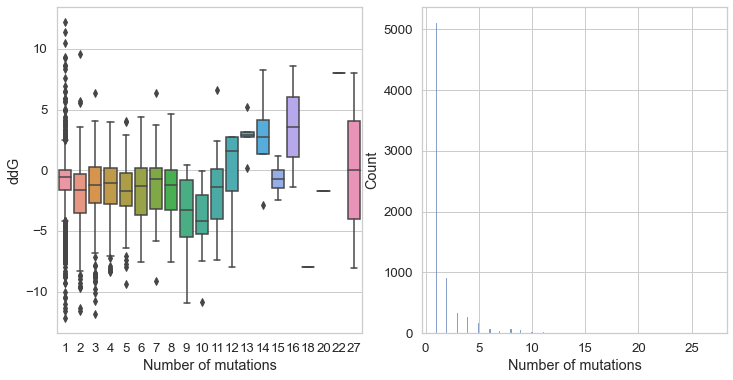

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x='Number of mutations', y='ddG', ax=ax[0])
# sns.swarmplot(data=df, x='Number of mutations', y='ddG', size=3, ax=ax[0])
sns.histplot(data=df, x='Number of mutations', ax=ax[1])
plt.show()

# Method

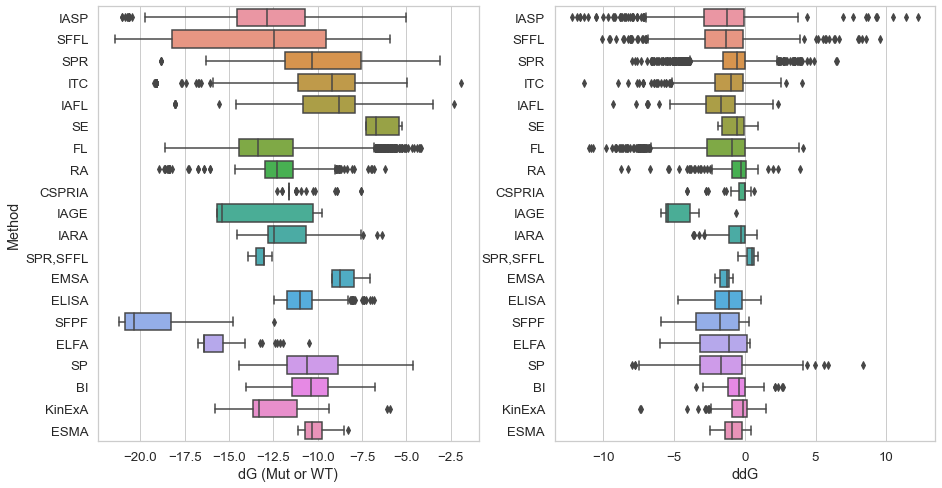

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# dG
x = pd.concat([df['Method'], df['Method']], ignore_index=True)
y = pd.concat([df['dG_wt'], df['dG_mut']], ignore_index=True)
sns.boxplot(x=y, y=x, ax=ax[0])
ax[0].set_xlabel('dG (Mut or WT)')
ax[0].set_ylabel('Method')

# ddG
sns.boxplot(data=df, x='ddG', y='Method', ax=ax[1])
ax[1].set_ylabel('')

# fig.suptitle('dG bias of different methods')
savefig('skempi2-method-dG-ddG-bias.pdf')
plt.show()

# Duplicated mutations

In [8]:
df_duplmut1 = df.groupby(['#Pdb', 'Mutation(s)_cleaned']).filter(lambda g: len(g) > 1)
df_duplmut2 = df.groupby(['#Pdb', 'Mutation(s)_cleaned']).filter(lambda g: len(g) > 2)
groups1 = df_duplmut1.groupby(['#Pdb', 'Mutation(s)_cleaned'])
groups2 = df_duplmut2.groupby(['#Pdb', 'Mutation(s)_cleaned'])

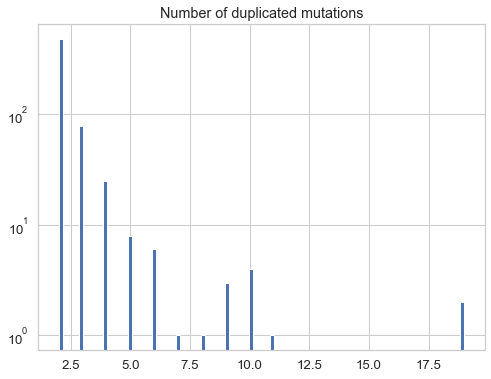

In [9]:
groups1.size().hist(bins=100, log=True)
plt.title('Number of duplicated mutations')
plt.show()

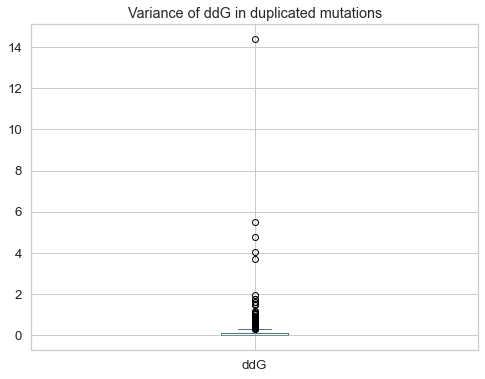

In [10]:
groups1['ddG'].var().plot.box()
plt.title('Variance of ddG in duplicated mutations')
plt.show()

/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

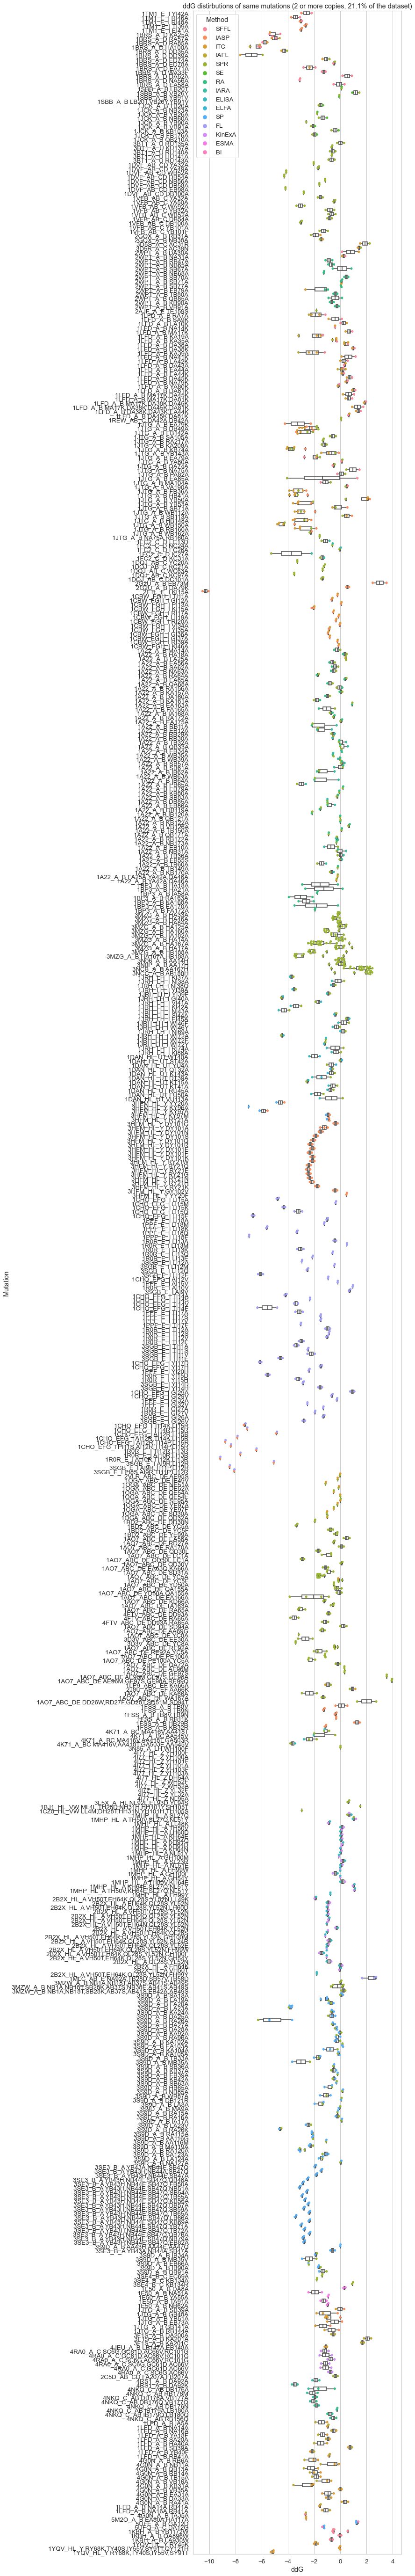

In [15]:
df_duplmut = df_duplmut1
ratio = len(df_duplmut) / len(df)
df_duplmut['Mutation'] = df_duplmut['#Pdb'] + ' ' + df_duplmut['Mutation(s)_cleaned']
plt.figure(figsize=(8, 100))
sns.boxplot(data=df_duplmut, x='ddG', y='Mutation', boxprops={'facecolor/': (.0, .0, .0, .0)})
sns.swarmplot(data=df_duplmut, x='ddG', y='Mutation', hue='Method')
plt.title(f'ddG distirbutions of same mutations (2 or more copies, {ratio*100:.1f}% of the dataset)')
savefig('duplicated-mutations-1.pdf')
plt.show()

/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anton/miniconda3/envs/sak_engineering/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

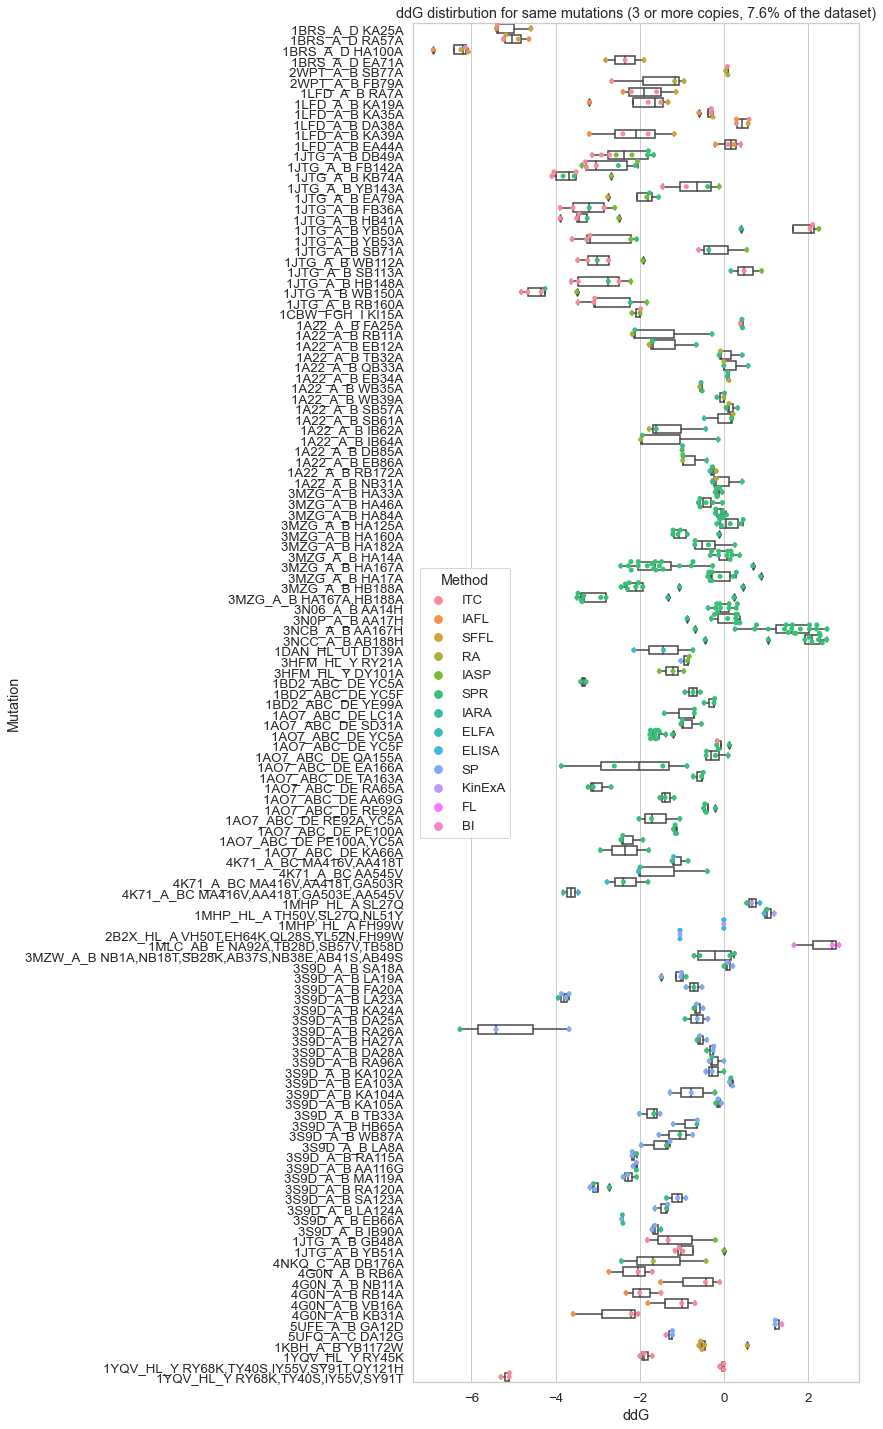

In [12]:
df_duplmut = df_duplmut2
ratio = len(df_duplmut) / len(df)
df_duplmut['Mutation'] = df_duplmut['#Pdb'] + ' ' + df_duplmut['Mutation(s)_cleaned']
plt.figure(figsize=(8, 25))
sns.boxplot(data=df_duplmut, x='ddG', y='Mutation', boxprops={'facecolor': (.0, .0, .0, .0)})
sns.swarmplot(data=df_duplmut, x='ddG', y='Mutation', hue='Method')
plt.title(f'ddG distirbution for same mutations (3 or more copies, {ratio*100:.1f}% of the dataset)')
savefig('duplicated-mutations-2.pdf')
plt.show()

# Amino acid types

In [35]:
from graphein.protein.resi_atoms import STANDARD_AMINO_ACID_MAPPING_1_TO_3, AROMATIC_RESIS

In [12]:
def classify(x):
    if x < 0: return 'Destabilizing'
    if x == 0: return 'Neutral'
    if x > 0: return 'Stabilizing'

df['Kind'] = df['ddG'].apply(classify)

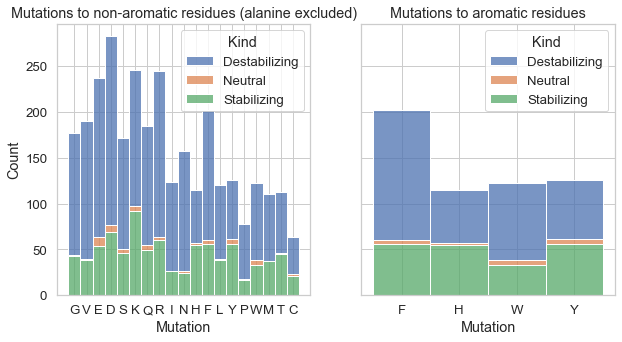

In [58]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))


df['Mutation'] = df['Mutation(s)_cleaned'].str[-1]
df['Mutation to aromatic'] = df['Mutation'].apply(
    lambda x: STANDARD_AMINO_ACID_MAPPING_1_TO_3[x] in AROMATIC_RESIS)
sns.histplot(df[df['Mutation'] != 'A'].sort_values('Kind'), x='Mutation',
             hue='Kind', multiple='stack', ax=ax[0])
ax[0].set_title('Mutations to non-aromatic residues (alanine excluded)')
sns.histplot(df[df['Mutation to aromatic']].sort_values('Kind'), x='Mutation',
             hue='Kind', multiple='stack', ax=ax[1], binwidth=5)
ax[1].set_title('Mutations to aromatic residues')

savefig('skempi-mutation-to-aromatic-stacked.pdf')
savefig('skempi-mutation-to-aromatic-stacked.png')
plt.show()